In [54]:
# Pandas for DataFrames
import pandas as pd 

# Matplotlib for style settings
import matplotlib   

# Show plots in-place
%matplotlib inline

In [55]:
# Check available styles
matplotlib.style.available

['fivethirtyeight',
 'seaborn-poster',
 'seaborn-paper',
 'seaborn-talk',
 'seaborn-dark',
 'bmh',
 'seaborn-ticks',
 'ggplot',
 'seaborn-bright',
 'seaborn-whitegrid',
 'seaborn-darkgrid',
 'seaborn-white',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn-muted',
 'classic',
 'seaborn-notebook',
 'grayscale',
 'dark_background',
 'seaborn-pastel',
 'seaborn-deep']

In [56]:
# Use an attractive default
matplotlib.style.use('ggplot')

In [57]:
# Shell line magic for quick inspection
!ls data

affiliation.csv interests.csv   python_time.csv
industry.csv    packages.csv    python_use.csv


In [63]:
# Read the data from CSV with pandas
interests = pd.read_csv("data/interests.csv")

In [64]:
# Get the first five entries
interests.head()

,Category,Votes
0,Big Data,25
1,Data Visualization,29
2,Machine Learning,23
3,Statistics,22
4,Version Control,7


In [65]:
# Pandas transforming functions have `inplace`
# Set "Category" as the index - row name equivalent
interests.set_index("Category", inplace=True)

In [76]:
interests.Votes

Category
Cloud Computing                 1
Databases                       1
Internet of Things              1
Parallel                        1
Version Control                 7
Web Scraping                   12
Data Cleaning                  17
Natural Language Processing    18
Statistics                     22
Machine Learning               23
Big Data                       25
Data Visualization             29
Name: Votes, dtype: int64

In [77]:
interests.index

Index(['Cloud Computing', 'Databases', 'Internet of Things', 'Parallel',
       'Version Control', 'Web Scraping', 'Data Cleaning',
       'Natural Language Processing', 'Statistics', 'Machine Learning',
       'Big Data', 'Data Visualization'],
      dtype='object', name='Category')

In [67]:
# Show the whole table
interests

,Votes
Category,
Big Data,25
Data Visualization,29
Machine Learning,23
Statistics,22
Version Control,7
Data Cleaning,17
Web Scraping,12
Natural Language Processing,18
Parallel,1


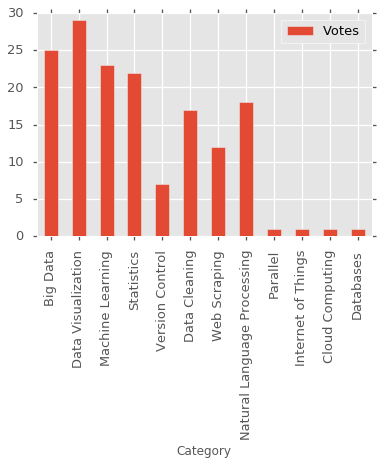

In [68]:
# Quick plotting
interests.plot(kind='bar')

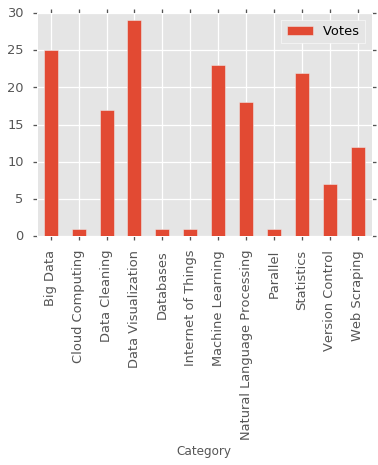

In [71]:
# Sort index alphabetically
interests.sort_index(inplace=True)
# Use convenience wrapper to plot functions
interests.plot.bar()

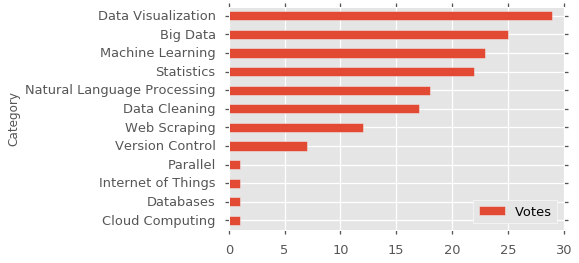

In [75]:
# Sort the DataFrame by Votes
interests.sort_values(by="Votes", inplace=True)
# Horizontal bar plot
interests.plot.barh()

# Plotly

In [73]:
# plotly could be installed easily with `pip install plotly`
# Use plotly in offline mode - no user account necessary
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode()

In [79]:
# `data` is a list of datasets
# `go.Bar` is one of the plotly 'geoms'
# `x` and `y` are columns of the DataFrame
data = [go.Bar(
        x=interests.index,
        y=interests.Votes)]

# Render new figure with data
iplot(go.Figure(data=data))

More on plotly:
* https://plot.ly/python/
* https://plot.ly/python/reference/

In [82]:
# Convert counts into percentages
# Apply vecotrized operations on the columns directly
percentages = interests.Votes/30*100
percentages

Category
Cloud Computing                 3.333333
Databases                       3.333333
Internet of Things              3.333333
Parallel                        3.333333
Version Control                23.333333
Web Scraping                   40.000000
Data Cleaning                  56.666667
Natural Language Processing    60.000000
Statistics                     73.333333
Machine Learning               76.666667
Big Data                       83.333333
Data Visualization             96.666667
Name: Votes, dtype: float64

In [83]:
# Round all the numbers
rounded_percentages = round(percentages, 2)
rounded_percentages

Category
Cloud Computing                 3.33
Databases                       3.33
Internet of Things              3.33
Parallel                        3.33
Version Control                23.33
Web Scraping                   40.00
Data Cleaning                  56.67
Natural Language Processing    60.00
Statistics                     73.33
Machine Learning               76.67
Big Data                       83.33
Data Visualization             96.67
Name: Votes, dtype: float64

In [84]:
# Convert to strings
string_percentages = rounded_percentages.apply(str)
string_percentages

Category
Cloud Computing                 3.33
Databases                       3.33
Internet of Things              3.33
Parallel                        3.33
Version Control                23.33
Web Scraping                    40.0
Data Cleaning                  56.67
Natural Language Processing     60.0
Statistics                     73.33
Machine Learning               76.67
Big Data                       83.33
Data Visualization             96.67
Name: Votes, dtype: object

In [86]:
# Add percent sign to each of them
percentage_labels = string_percentages + "%"
percentage_labels

Category
Cloud Computing                 3.33%
Databases                       3.33%
Internet of Things              3.33%
Parallel                        3.33%
Version Control                23.33%
Web Scraping                    40.0%
Data Cleaning                  56.67%
Natural Language Processing     60.0%
Statistics                     73.33%
Machine Learning               76.67%
Big Data                       83.33%
Data Visualization             96.67%
Name: Votes, dtype: object

In [87]:
# All of the above in one go
percentage_labels = round((interests.Votes/30*100),2).apply(str) + "%"
percentage_labels

Category
Cloud Computing                 3.33%
Databases                       3.33%
Internet of Things              3.33%
Parallel                        3.33%
Version Control                23.33%
Web Scraping                    40.0%
Data Cleaning                  56.67%
Natural Language Processing     60.0%
Statistics                     73.33%
Machine Learning               76.67%
Big Data                       83.33%
Data Visualization             96.67%
Name: Votes, dtype: object

In [89]:
# Create plotly `data` with `text` element - revealed on hover
data = [go.Bar(
        x=interests.index,
        y=interests.Votes,
        text=percentage_labels)]

In [90]:
# Add elements to layout
# each sub-category is a dict
layout = go.Layout(height=600,
                   xaxis=dict(
                        tickangle=-90),
                   margin=dict(
                        b=200))

# Same as above
layout = go.Layout(height=600,
                   xaxis={'tickangle':-90},
                   margin={'b':200})

iplot(go.Figure(data=data,layout=layout))